In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [4]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
938/938 [==============================] - 53s 56ms/step - loss: 0.2723 - accuracy: 0.9163
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0592 - accuracy: 0.9818
Epoch 4/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0436 - accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0547 - accuracy: 0.9849
0.9848999977111816


## 합성곱 연산
- Dense층은 입력 특성 공간에 있는 전역 패턴을 학습하는 반면, 합성곱 층은 지역 패턴을 학습한다.
  - 이미지의 경우 2D 윈도우로 입력하여 패턴을 찾는다.

- 학습된 패턴은 평행 이동 불변성을 가진다.
- ConvNet은 패턴의 공간적 계층 구조를 학습할 수 있다.

- 합성곱 연산을 통해 출력 특성 맵을 만들어 지는데
  - 깊이 축에 있는 각 차원은 하나의 특성(필터)
  - 2D 텐서 output[:, :, n]은 입력에 대한 이 필터 응답을 나타내는 2D 공간상의 맵이다.
  - 

In [1]:
import os, shutil

original_dataset_dir = 'datasets/train'

base_dir = 'datasets/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cat')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    # 처음 1000장의 고양이 이미지를 train_cats_dir 에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst) 

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    # 처음 1000장의 r개 이미지를 train_cats_dir 에 복사
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst) 

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
# 복사가 잘 되었는지 확인

print("훈련용 고양이 이미지 전체 개수 :", len(os.listdir(train_cats_dir)))
print("훈련용 개 이미지 전체 개수 :", len(os.listdir(train_dogs_dir)))
print("검증용 고양이 이미지 전체 개수 :", len(os.listdir(validation_cats_dir)))
print("검증용 개 이미지 전체 개수 :", len(os.listdir(validation_dogs_dir)))
print("훈련용 고양이 이미지 전체 개수 :", len(os.listdir(test_cats_dir)))
print("훈련용 개 이미지 전체 개수 :", len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수 : 1000
훈련용 개 이미지 전체 개수 : 1000
검증용 고양이 이미지 전체 개수 : 500
검증용 개 이미지 전체 개수 : 500
훈련용 고양이 이미지 전체 개수 : 500
훈련용 개 이미지 전체 개수 : 500


- 각 클래스마다 동일한 개수의 샘플이 필요하다 ( 보다 높은 정확도를 위함)

### 네트워크 구성하기

- 특성 맵의 깊이는 네트워크에서 점진적으로 증가(32 -> 128), 특성 맵의 크기는 감소한다 (150 x 150 -> 7 x 7)

In [8]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [9]:
# 모델 훈련 설정하기
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


### 데이터 전처리 해주기
1. 사진 파일 읽기
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩하기
3. 부동 소수 타입의 텐서로 변환해주기
4. 픽셀 값의 스케일을 0,1 사이로 조정하기 (255 로 나눠주기)

In [10]:
# ImageDataGenerator 를 사용하여 디렉터리에서 이미지 읽기

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), # 모든 이미지를 150 x 150 크기로 바꿈
    batch_size=20,
    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
    # class_mode 는 다중일 때 (categorical / sparse) 이진 분류 일때는 'binary'를 사용
    # 오토인코더처럼 입력을 타깃으로 하는 경우에는 'input' 으로 지정   

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


- 출력은 150 X 150 RGB 이미지
- 20,150,150,3 의 크기
- 이진 레이블 (20,) 크기를 가진다

- 각 배치에는 20개의 샘플(배치 크기) 이 있다
- 제너레이터는 이 배치를 무한정 만들어 낸다.
- 타깃 폴더에 있는 이미지를 끝없이 반복하기 때문에 break 가 필요

In [17]:
for data_batch, labels_batch in train_generator:
    print("배치 데이터 크기:", data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


#### 제너레이터를 사용한 데이터에 모델 훈련하기
- fit_generator 
    - fit 과 동일하지만 제너레이터에 사용가능하다
    - 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하ㄴ는 파이썬 제너레이터를 만든다
    - steps_per_epoch 로 제너레이터로부터 얼마나 많은 샘플을 뽑을지 정한다
    - steps_per_epoch 횟수만큼 경사 하강법 단계를 실행한 후 훈련 프로세스는 다음 에포크로 넘어가게 된다.
    - 여기서는 20개의 샘플이 하나의 배치이므로 2,000 개의 샘플을 모두 처리할 때 까지 100개의 배치를 뽑아낸다.


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

<ipython-input-18-8b1ced41fa27>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 21s 146ms/step - loss: 0.6923 - acc: 0.5340 - val_loss: 0.6652 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6130 - acc: 0.6710 - val_loss: 0.6225 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 10s 95ms/step - loss: 0.5554 - acc: 0.7115 - val_loss: 0.6200 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5104 - acc: 0.7500 - val_loss: 0.5686 - val_acc: 0.7330
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.4886 - acc: 0.7640 - val_loss: 0.5885 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 10s 99ms/step - loss: 0.4464 - acc: 0.8015 - val_loss: 0.5645 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 10s 103ms/step - loss: 0.4208 - acc: 0.8050 - val_loss: 0.5567 - val_acc: 0.7310
Epoch 8/30
100/100 [==============================] - 10s

In [19]:
model.save('cats_and_dogs_small_1.h5')

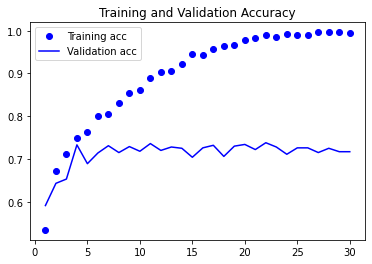

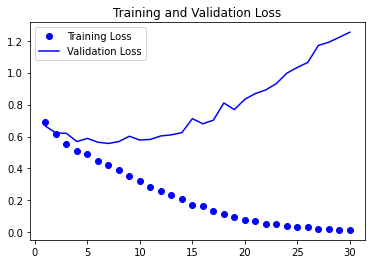

In [20]:
# 훈련 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

- 과대적합의 특성을 보여준다
  - 훈련 정확도는 100% 인 반면, 검증 정확도는 70~72에 멈춰있다
  - 샘플의 수(2,000)개로 적기 때문에 과대적합이 생겨난다
  - 따라서 Dropout / 가중치 감소 등을 활용을 해야한다.
  - 여기서는 데이터 증식을 한다

#### 데이터 증식
- 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법
- 여러가지 랜덤한 변환을 적용하여 샘플을 늘려준다
- 훈련할 때 모델이 정확히 같은 데이터를 두번 만나지 않도록 하는 것이 목표이다.

In [12]:
# ImageDataGenerator 를 사용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

- rotation_range : 랜덤하게 사진을 회전시킬 각도 범위 (0~180도 사이)
- width_shift_range, height_shift_range : 사진을 수평과 수직으로 랜덤하게 평행 이동 시킬 범위
- shear_range : 랜덤하게 전단 변환을 적용할 각도 범위 (y 축 방향으로 각도를 증가시켜줌)
- zoom_range : 랜덤하게 사진을 확대/축소
- horizontal_flip : 랜덤하게 이미지를 수평으로 뒤집어줌 ( 수평 대칭을 가정할 수 있을 때 사용 (풍경이나 인물))
  - 도로 표지판의 경우 사용 불가
- fill_mode : 회전이나 가로/세로 이동으로 인해 새롭게 생성해야할 픽셀을 채울 전략
  - 'nearest'는 인접한 픽셀 사용
  - 'constant'는 cval 매개변수의 값을 사용
  - 'reflect', 'wrap' 이 있음  


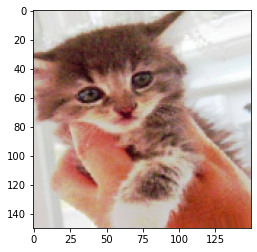

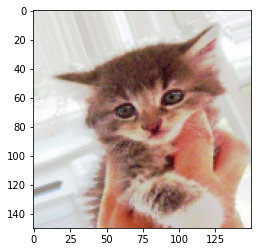

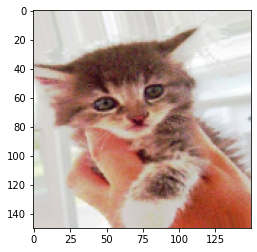

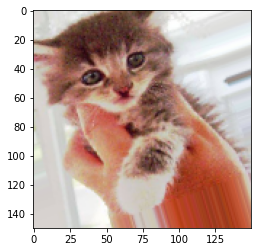

In [13]:
# 랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image
import matplotlib.pyplot as plt
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img) # (150,150,3) 크기의 넘파이 배열로 변환해준다
x = x.reshape((1,) + x.shape) # (1,150,150,3) 의 크기로 변환해준다

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

- 데이터 증식을 사용하여 새로운 네트워크를 훈련할 때, 같은 입력 데이터가 주입되지는 않는다
- 하지만, 적은 수의 원본 이미지에서 만들어졌기 때문에, 입력 데이터들 사이에 상호 연관성이 크다.
- 즉, 새로운 정보를 만들 수 없고, 기존 정보의 재조합만 가능하다
- 따라서 완전히 과대적합을 제거하기에는 충분하지 않다.
- 그래서 D완전 연결을 해주기 전, Dropout 층을 추가해본다

In [14]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6989 - acc: 0.5382 - val_loss: 0.9252 - val_acc: 0.5025
Epoch 2/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6592 - acc: 0.5934 - val_loss: 0.7345 - val_acc: 0.6153
Epoch 3/100
100/100 [==============================] - 26s 265ms/step - loss: 0.6355 - acc: 0.6237 - val_loss: 0.6100 - val_acc: 0.6605
Epoch 4/100
100/100 [==============================] - 27s 269ms/step - loss: 0.6141 - acc: 0.6495 - val_loss: 0.5442 - val_acc: 0.6765
Epoch 5/100
100/100 [==============================] - 28s 275ms/step - loss: 0.6078 - acc: 0.6648 - val_loss: 0.7010 - val_acc: 0.6053
Epoch 6/100
 61/100 [=================>............] - ETA: 9s - loss: 0.5996 - acc: 0.6710

KeyboardInterrupt: 

What's the difference
W

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

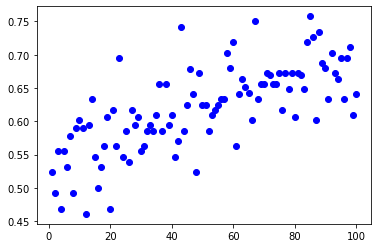

In [ ]:
# 훈련 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()